In [25]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data, parse the dates, and set the index
df = pd.read_csv('shear_velocity_2023.csv', parse_dates=['time'], index_col='time')
#df['ustar'] = df['ustar']/10
# separate by season
spring = df['2023-03-01':'2023-06-21']
summer = df['2023-06-22':'2023-09-21']


In [26]:
# create copies of the slices based on some condition
spring = df[(df.index >= '2023-03-01') & (df.index <= '2023-06-21')].copy()
summer = df[(df.index >= '2023-06-21') & (df.index <= '2023-09-21')].copy()

# modify spring DataFrame
spring.loc[:, 'CS'] = df['ustar'] / 0.00738911818442164
spring.loc[:, 'FS'] = df['ustar'] / 0.000117616886091442
spring.loc[:, 'S'] = df['ustar'] / 6.05742704891939E-07
spring.loc[:, 'C'] = df['ustar'] / 1.40629932202484E-08

# modify summer DataFrame
summer.loc[:, 'CS'] = df['ustar'] / 0.00842075945232846
summer.loc[:, 'FS'] = df['ustar'] / 0.000140023412813315
summer.loc[:, 'S'] = df['ustar'] / 7.27391790368292E-07
summer.loc[:, 'C'] = df['ustar'] / 1.62206024008124E-08

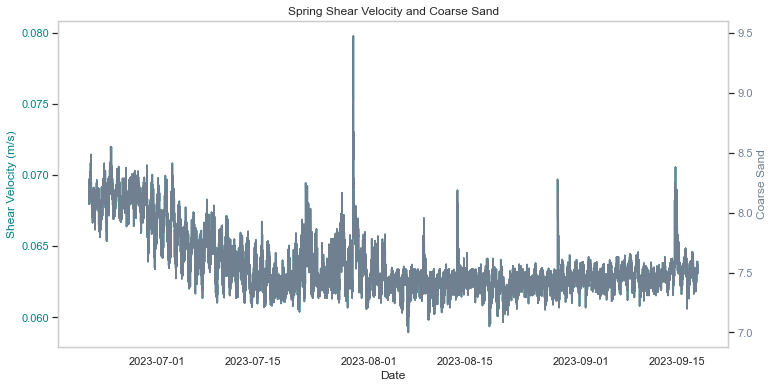

In [29]:
# plot time series of shear velocity for coarse sand
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot ustar on the primary y-axis
color = 'teal'
ax1.set_xlabel('Date')
ax1.set_ylabel('Shear Velocity (m/s)', color=color)
ax1.plot(summer.index, summer['ustar'], color=color, label='u*')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)
# plot coarse sand on the secondary y-axis
ax2 = ax1.twinx()
color = 'slategray'
ax2.set_ylabel('Coarse Sand', color=color)
ax2.plot(summer.index, summer['CS'], color=color, label='Coarse Sand')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

plt.title('Spring Shear Velocity and Coarse Sand')
plt.show()

